In [1]:
import pandas as pd
from tqdm import tqdm # handy for timing interations
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import time
from collections import Counter
from scipy.stats import mode
import datetime

In [2]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12

#### Declare paths to the .csv locations

In [18]:
path_to_posts = '/Users/Chiara Sammarco/Downloads/instagram_posts.zip'
path_to_locs = '/Users/Chiara Sammarco/Downloads/instagram_locations.zip'
path_to_profiles = '/Users/Chiara Sammarco/Downloads/instagram_profiles.zip'

#### Setup for the data

In [9]:
loc_df = pd.read_csv(path_to_locs, delimiter='\t')

In [19]:
profiles_df = pd.read_csv(path_to_profiles, delimiter='\t')

### Research Question 1

##### Let's study the "instagram_profiles" dataset

In [12]:
n = 10
top_10_profiles = profiles_df.sort_values(by=['followers'], ascending=False).head(n)
top_10_profiles

# We compute the 10 most followed Instagram accounts.

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


In [15]:
summary_prof = profiles_df.describe()
summary_prof

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


We use this code to get a summary of the numerical variables of the dataset. In fact it computes the count, the mean, the standard deviation and the quantiles of the dataset. We have to look only at the columns for "following", "followers" and "n_posts" because "sid" and "profile_id" are, literally, just IDs. The most important thing we notice is that the mean of the followers for every user is higher than the following.

In [16]:
profiles_df.head(10)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
5,4184465,1.450642e+08,sabahlke,Sarah bahlke,NaN,266.0,192.0,590.0,NaN,2019-08-01 14:40:16.443 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,Your spot for the best Western Mass. high scho...,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
7,4184472,1.446651e+09,hvcanes,Hoosac Valley,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:52.635 -0400,NaN
8,4184475,1.743726e+09,will_jay_k,William Kramer,I’d rather die a big death than live a small life,115.0,183.0,37.0,NaN,2019-08-01 14:40:59.969 -0400,False
9,4184476,5.455198e+09,ashley_downing722,Ashley Downing,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:41:12.826 -0400,NaN


In [17]:
profiles_df.isna().sum() # let's check how many NA we have

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [18]:
profiles_df.description.fillna('',inplace=True) # let's replace our missing values
profiles_df.firstname_lastname.fillna('',inplace=True)
profiles_df.url.fillna('',inplace=True)
profiles_df.is_business_account.fillna(False,inplace=True)
profiles_df.following.fillna(0,inplace=True)
profiles_df.followers.fillna(0,inplace=True)
profiles_df.n_posts.fillna(0,inplace=True)

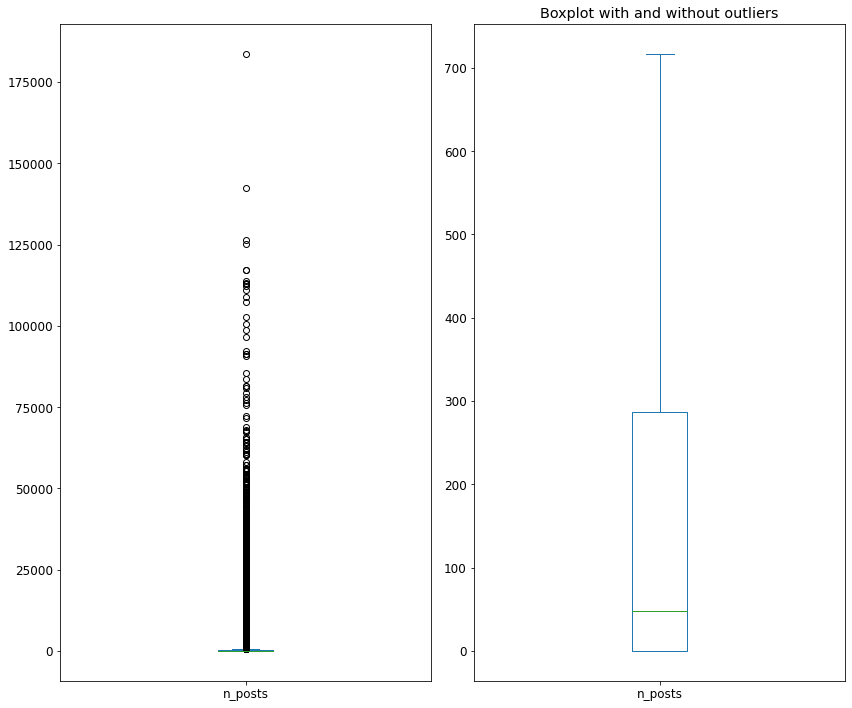

In [19]:
n_posts_ordered = profiles_df.sort_values(by="n_posts", ascending=False)
fig, (ax1, ax2) = plt.subplots(ncols=2)

n_posts_ordered.plot(kind='box', y="n_posts", ax=ax1) 
n_posts_ordered.plot(showfliers=False, y="n_posts", kind='box', ax=ax2) 

plt.title('Boxplot with and without outliers')
fig.tight_layout()

plt.show()

##### Let's study the "instagram_locations" dataset

In [21]:
summary_loc = loc_df.describe()
summary_loc

,sid,id,lat,lng
count,1.022658e+06,1.022658e+06,1.016495e+06,1.016495e+06
mean,5.274856e+05,3.152851e+14,-1.529215e+01,3.421718e+01
std,2.994567e+05,5.795031e+14,7.615085e+01,2.201081e+01
min,1.000000e+00,7.000000e+00,-1.799830e+02,-9.000000e+01
25%,2.688392e+05,2.522377e+08,-8.015575e+01,2.997555e+01
50%,5.300405e+05,8.573350e+08,-2.450000e+00,4.067820e+01
75%,7.866598e+05,3.304662e+14,3.071740e+01,4.884722e+01
max,1.043657e+06,2.402148e+16,1.799941e+02,8.999870e+01


We notice that it doesn't make sense to compute the describe function for the locations dataset.
In fact, we try running the head to look at the column names.
What we figure out is that the important data we need from this dataset is all non numerical so it doesn't make sense to compute any statistical value. The important thing from this dataset is the names of the various locations that Instagram has in the system.

In [22]:
loc_df.head(10)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
5,326440,242403516699715,The Lakes at Discovery Bay,NaN,NaN,NaN,NaN,NaN,(925) 308-3883,NaN,...,NaN,NaN,NaN,NaN,-121.621549,37.925412,TheLakesatDiscoveryBay,the-lakes-at-discovery-bay,www.TheLakesatDiscoveryBay.com,2019-04-02 15:22:55.367
6,719988,1651686855080719,"Tampines, Singapore",Tampines,529941,Singapore,NaN,SG,NaN,False,...,NaN,NaN,NaN,NaN,103.949729,1.355203,TampinesZingapurA,tampines-singapore,NaN,2019-05-29 01:21:56.635
7,719992,240487083,Sittano’s Bar & Restaurant,"Shop R03 Westfield Penrith, Level 1 / Riley St...",2750,"Penrith, New South Wales",NaN,AU,0247224444,False,...,Penrith,penrith,AU,Australia,150.694367,-33.751031,Sittanos,sittanos-bar-restaurant,http://www.sittanos.com.au/,2019-05-29 01:22:12.909
8,719996,750669435108256,วัดท่าซุง อุทัยธานี,3212,61000,"Nam Soem, Uthai Thani, Thailand",NaN,TH,0854623871,False,...,NaN,NaN,NaN,NaN,100.073586,15.329776,NaN,NaN,http://www.watthasung.com,2019-05-29 01:22:27.749
9,719998,223283275,Cine Atlas,Hatanpään valtatie 1,33100,"Tampere, Finland",NaN,FI,NaN,False,...,NaN,NaN,NaN,NaN,23.766263,61.495690,NaN,cine-atlas,http://www.finnkino.fi/cinemas/tampere_cine_atlas,2019-05-29 01:22:35.936


##### Let's study the "instagram_posts" dataset

Since the "instagram_posts" dataset is such a "heavy" dataset we don't run it fully but we only use the columns needed for every exercises using the command "usecols" in the "pd.read_csv" line. Although, to do this exploratory we can run just a few rows so we can look at the variables we're working with.

In [24]:
test_posts_df = pd.read_csv(path_to_posts, delimiter='\t', nrows = 5)
test_posts_df

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


### Research Question 2


#### Plot the number of posts for each profile in descending order.

Text(0, 0.5, 'log(# Profiles)')

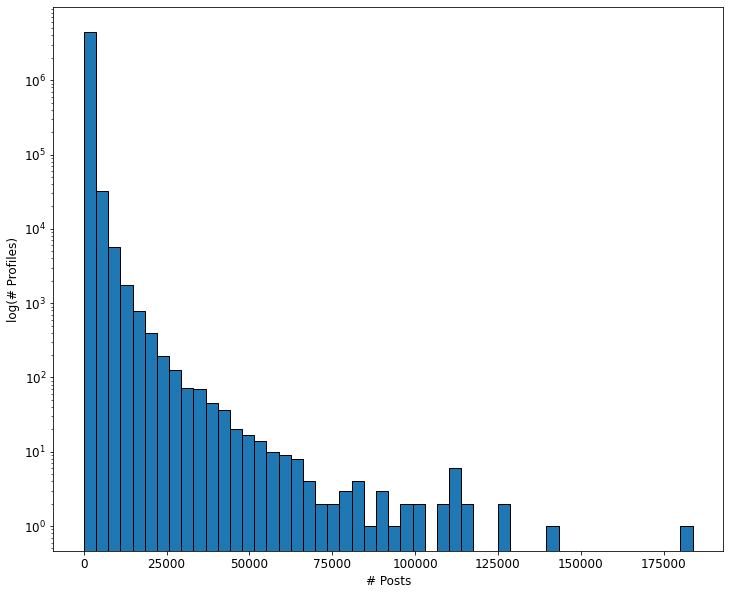

In [25]:
sorted_profiles = profiles_df.sort_values(by='n_posts', ascending=False)
sorted_profiles.dropna(subset=['n_posts'], inplace=True)
sorted_profiles['n_posts'].plot(kind='hist', logy=True, bins=50, edgecolor='black')
plt.xlabel('# Posts')
plt.ylabel('log(# Profiles)')

# There's a problem with this graph since 
# we should get an ascending plot.

#### What posts have the highest number of "likes"?

In [28]:
data_posts = pd.read_csv(path_to_posts, delimiter='\t', usecols = ["post_id", "post_type", "profile_id", "numbr_likes", "number_comments", "location_id"])

In [29]:
max_likes = data_posts.sort_values(by="numbr_likes", ascending=False)
max_likes.head()

,post_id,profile_id,location_id,post_type,numbr_likes,number_comments
19624085,Bt3yaXmAM0d,49067778.0,NaN,1,8822952.0,165886.0
19623988,BuwffB7g8cK,49067778.0,NaN,1,5447066.0,25303.0
19624082,Buc1gyZAaMQ,49067778.0,NaN,1,5116398.0,40608.0
19623986,BvcukE8AMuG,49067778.0,NaN,1,4271466.0,30770.0
39701024,BqSLFVBFLfq,427553890.0,3.214182e+14,1,4264745.0,18691.0


#### What posts have the most and the least number of comments?

In [30]:
data_posts.sort_values(by = 'number_comments', axis = 0, inplace = True)
data_posts['number_comments']
print("The posts with the smallest number of comments is: ", data_posts.iloc[1])
print("The posts with the gratest number of comments is: ", data_posts.iloc[-1])

The posts with the smallest number of comments is:  post_id              BzWK_KVgiXi
profile_id         10990845790.0
location_id          249436045.0
post_type                      1
numbr_likes                  3.0
number_comments              0.0
Name: 13108581, dtype: object
The posts with the gratest number of comments is:  post_id            BipsAY-nIZK
profile_id                 NaN
location_id                NaN
post_type                    1
numbr_likes                NaN
number_comments            NaN
Name: 19917787, dtype: object


#### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [31]:
noloc = data_posts["location_id"].isna().sum()
noloc = np.array(int(noloc))

In [34]:
wloc = len(data_posts["location_id"]) - noloc
wloc = np.array(int(wloc))

In [35]:
data = [wloc,noloc]

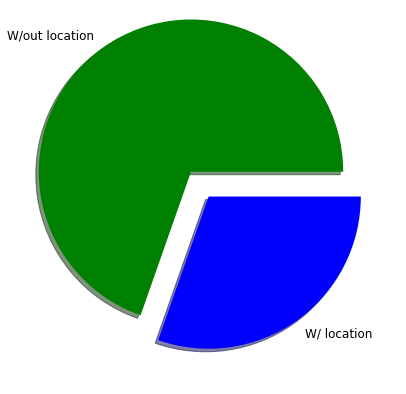

In [37]:
lab = ["W/out location", "W/ location"]
color = ["green", "blue"]
myexplode = [0.2, 0]
fig = plt.figure(figsize = (10, 7))
plt.pie(data, labels = lab, 
        colors = color, 
        shadow = True, 
        explode = myexplode)
 
# Show plot
plt.show()

We use the pie plot to show the proportion between the posts without the location and with the location. As we can tell the number of posts with no location is higher than the ones with the location. This means that not many people add the Location to their posts

#### How many posts include only photos? How many also have videos?

In [38]:
#1 - Photo, 2 - Video, 3 - Multy
print(data_posts['post_type'].value_counts()[1], 'posts includes only photos')
print(data_posts['post_type'].value_counts()[3], 'posts includes both videos and photos')

41534486 posts includes only photos
40943 posts includes both videos and photos


#### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?


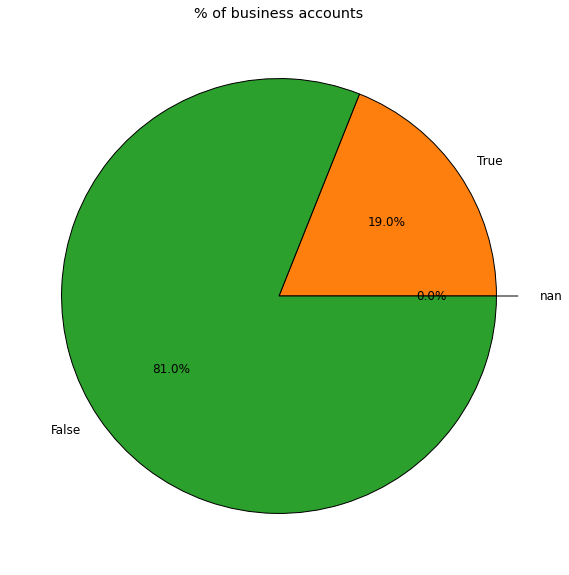

In [39]:
N = len(profiles_df)
n_business_na = profiles_df['is_business_account'].isna().sum()
n_business_false = profiles_df['is_business_account'].value_counts()[False]
n_business_true = profiles_df['is_business_account'].value_counts()[True]

labels = ['nan', 'True', 'False']

plt.pie([n_business_na, n_business_true, n_business_false], labels=labels, explode=[.1, 0, 0], autopct='%1.1f%%', 
        wedgeprops={"edgecolor": "black"})
plt.title('% of business accounts')

plt.show()

From this plot we can tell that there are way more non-business accounts than business ones. This is probably because there's a bigger percentage of people that uses Instagram as a social for fun than businesses that, maybe, want to use the platform as a way of showing their assets.

### Research Question 3

#### What is the most common time in which users publish their posts?

In [3]:
columns = ['cts']
posts_df = pd.to_datetime(pd.read_csv(path_to_posts, delimiter='\t', usecols=columns).dropna().stack()).unstack()

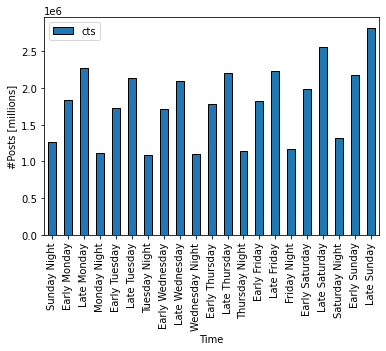

In [4]:
# We form bins to have divide each day in three time slots

bins = pd.IntervalIndex.from_tuples([(0, 7), (8, 15), (16, 23)])

labels = ["Sunday Night", "Early Monday", "Late Monday", 
          "Monday Night", "Early Tuesday", "Late Tuesday", 
          "Tuesday Night", "Early Wednesday", "Late Wednesday", 
          "Wednesday Night", "Early Thursday", "Late Thursday", 
          "Thursday Night", "Early Friday", "Late Friday", 
          "Friday Night", "Early Saturday", "Late Saturday", 
          "Saturday Night", "Early Sunday", "Late Sunday"]

loc = range(len(labels))

# The following statement groups the posts_df by weekdays and then by the above-mentioned bins 
# then we count the values in each group and finally plot it as a bar graph

posts_df.groupby([posts_df["cts"].dt.weekday, 
                  pd.cut(posts_df["cts"].dt.hour, bins=bins)]).count().plot(kind="bar",
                                                                            edgecolor="black")
plt.xlabel("Time")
plt.ylabel("#Posts [millions]")
plt.xticks(loc, labels, rotation="vertical")
plt.show()


Note that: Night is the time interval from 24:00 to 07:59. \
           Early is the time interval from 08:00 to 15.59. \
           Late  is the time interval from 16:00 to 23:59.

From the plot we can see that the most common time to post on Instagram is late sunday.

#### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [26]:
def time_to_plot(list_of_intervals):
    bin_list = [] # It stores start and end times of each interval
    labels = []   # This is useful for plotting x labels
    for t_0, t_end in list_of_intervals:
        labels.append(' -> '.join([t_0, t_end]))
        
        t_0 = pd.to_datetime(t_0).time()
        t_end = pd.to_datetime(t_end).time()
        
        bin_list.append((t_0.hour, t_end.hour))
    
    loc = range(len(labels))
    bins = pd.IntervalIndex.from_tuples(bin_list) # Create pandas bins for grouping
    result_df = posts_df.groupby(pd.cut(posts_df["cts"].dt.hour, bins=bins)).count()
    
    result_df.plot(kind="bar", edgecolor="black")
   
    plt.xlabel("Time")
    plt.ylabel("#Posts [millions]")
    plt.xticks(loc, labels, rotation="vertical")
    plt.show()

#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

              cts
cts              
(6, 10]   5366649
(11, 13]  3894113
(14, 16]  4604061
(17, 19]  4986139
(20, 23]  6420525
(0, 2]    2666581
(3, 5]    2179579


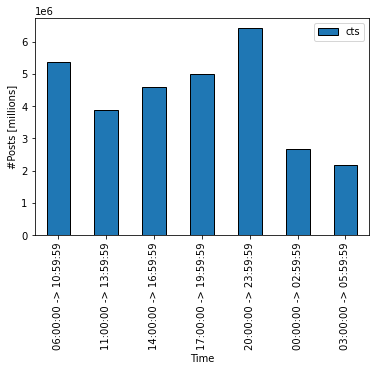

In [27]:
time_intervals = [("06:00:00", "10:59:59"), 
                  ("11:00:00", "13:59:59"), 
                  ("14:00:00", "16:59:59"), 
                  ("17:00:00", "19:59:59"), 
                  ("20:00:00", "23:59:59"),
                  ("00:00:00", "02:59:59"),
                  ("03:00:00", "05:59:59")]

time_to_plot(time_intervals)

### Research Question 4

#### In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis

#### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [43]:
def find_posts(profile_id, df):
    post_id = df.loc[df['profile_id'] == profile_id]
    return post_id


#### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles 


In [61]:
def n_top_posted(n, df):
  # top_profile = []
    posts = pd.DataFrame()
  
    top_profiles = profiles_df.sort_values('n_posts', ascending = False)
    # Retrieve from 'profile.csv' the profiles that posted the higher number of posts
    for i in range(n):
    
        posts = posts.append(find_posts(top_profiles.loc[i, 'profile_id'], df), ignore_index = True) # Find posts for the top profiles
        #print(posts)
        #top_profile.append(top_profiles.loc[i, 'profile_name']) 
        #print(top_profile)
        return posts

In [56]:
columns = ['profile_id' , 'numbr_likes', 'number_comments', 'cts']
data_posts = pd.read_csv(path_to_posts, usecols = columns, delimiter='\t')

In [57]:
data_posts['cts'] = pd.to_datetime(data_posts['cts'])

In [58]:
data_posts

,profile_id,cts,numbr_likes,number_comments
0,2.237948e+09,2017-08-06 20:06:57,80.0,0.0
1,5.579335e+09,2017-06-19 09:31:16,25.0,1.0
2,3.134296e+08,2017-03-11 20:05:03,9.0,0.0
3,1.837593e+09,2016-09-13 16:27:16,4.0,0.0
4,1.131527e+09,2015-10-18 10:19:27,8.0,0.0
...,...,...,...,...
42710192,5.556457e+09,2017-12-13 15:38:04,74.0,0.0
42710193,3.371865e+08,2017-10-31 11:28:01,49.0,0.0
42710194,3.289886e+09,2017-01-13 20:16:37,18.0,0.0
42710195,8.536366e+09,2019-05-20 20:07:52,27.0,1.0


#### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [62]:
top_10 = n_top_posted(10, data_posts).groupby(by = 'profile_id', as_index= False).mean() #n = 19 if we want to find 10 profile ids that return an output
top_10

C:\Users\Chiara Sammarco\AppData\Local\Temp\ipykernel_13820\440770405.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts = posts.append(find_posts(top_profiles.loc[i, 'profile_id'], df), ignore_index = True)     #find posts for the top profiles


,profile_id,numbr_likes,number_comments
0,4.721050e+09,12.666667,0.4


In [63]:
# Dataframe containing all the top profiles with the corresponding cts

top_profile_id = list(top_10.loc[:,'profile_id'])       # Stores the top_profile ids in a list
df_top_profiles = data_posts[data_posts['profile_id'].isin(top_profile_id)].sort_values(by = 'profile_id')
df_top_profiles

,profile_id,cts,numbr_likes,number_comments
13627713,4.721050e+09,2019-08-01 14:12:52,5.0,1.0
13627714,4.721050e+09,2019-07-31 13:47:48,9.0,0.0
13627715,4.721050e+09,2019-07-14 15:07:45,14.0,0.0
13627716,4.721050e+09,2019-07-08 03:43:04,14.0,0.0
13627717,4.721050e+09,2019-06-19 14:39:47,17.0,1.0
13627718,4.721050e+09,2019-06-16 04:53:38,9.0,0.0
13627719,4.721050e+09,2019-06-15 14:58:52,8.0,0.0
13627720,4.721050e+09,2019-06-10 14:16:13,11.0,0.0
13627721,4.721050e+09,2019-06-06 05:50:08,19.0,0.0
13627722,4.721050e+09,2019-06-06 04:12:35,15.0,1.0


In [64]:
df_top_profiles_red  = df_top_profiles.loc[:,['profile_id', 'cts']]
df_top_profiles_red

,profile_id,cts
13627713,4.721050e+09,2019-08-01 14:12:52
13627714,4.721050e+09,2019-07-31 13:47:48
13627715,4.721050e+09,2019-07-14 15:07:45
13627716,4.721050e+09,2019-07-08 03:43:04
13627717,4.721050e+09,2019-06-19 14:39:47
13627718,4.721050e+09,2019-06-16 04:53:38
13627719,4.721050e+09,2019-06-15 14:58:52
13627720,4.721050e+09,2019-06-10 14:16:13
13627721,4.721050e+09,2019-06-06 05:50:08
13627722,4.721050e+09,2019-06-06 04:12:35


As we can see, our dataset is inconsistent. \
If we retrieve the top_profiles from the profile.csv and for each of them find the corresponding posts, only 6 profiles results in the posts.csv file.

#### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. 
Interpret the resulting chart.

In [65]:
# Function that receives a time intervals list as a parameter and returns a plot 
# with the number of posts for each given interval.
def time_to_plot(list_of_intervals):
    bin_list = []
    labels = []
    for t_0, t_end in list_of_intervals:
        labels.append(' -> '.join([t_0, t_end]))      # Create the labels of the histogram
        
        t_0 = pd.to_datetime(t_0).time()
        t_end = pd.to_datetime(t_end).time()
        
        bin_list.append((t_0.hour, t_end.hour))
    
    loc = np.arange(len(labels))*6
    bins = pd.IntervalIndex.from_tuples(bin_list)
   
    result_df = df_top_profiles_red.groupby([pd.cut(df_top_profiles_red['cts'].dt.hour, bins=bins), 'profile_id']).count()
    # print(result_df)
    
    result_df.plot(kind="bar", edgecolor="black", use_index = False)

   
    plt.xlabel("Time")
    plt.ylabel("#Posts [millions]")
    plt.xticks(loc, labels, rotation="vertical")
    plt.show()


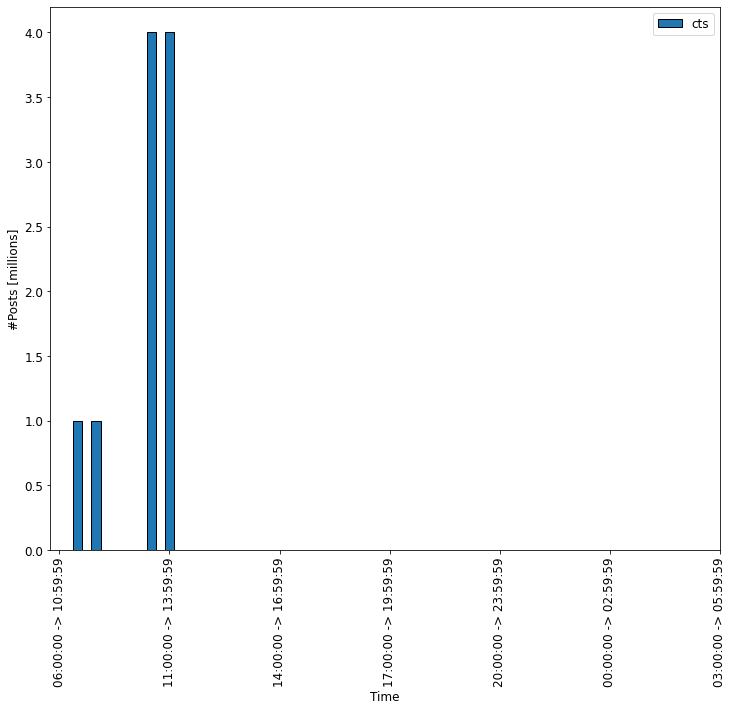

In [66]:
time_intervals = [("06:00:00", "10:59:59"), 
                  ("11:00:00", "13:59:59"), 
                  ("14:00:00", "16:59:59"), 
                  ("17:00:00", "19:59:59"), 
                  ("20:00:00", "23:59:59"),
                  ("00:00:00", "02:59:59"),
                  ("03:00:00", "05:59:59")]
#for i in range(len(time_intervals)):               
time_to_plot(time_intervals)

We notice that these 10 profiles mostly posted in the early morning and before lunchtime.

### Research Question 5

 ##### Plot the top 10 most popular users in terms of followers and their number of posts.

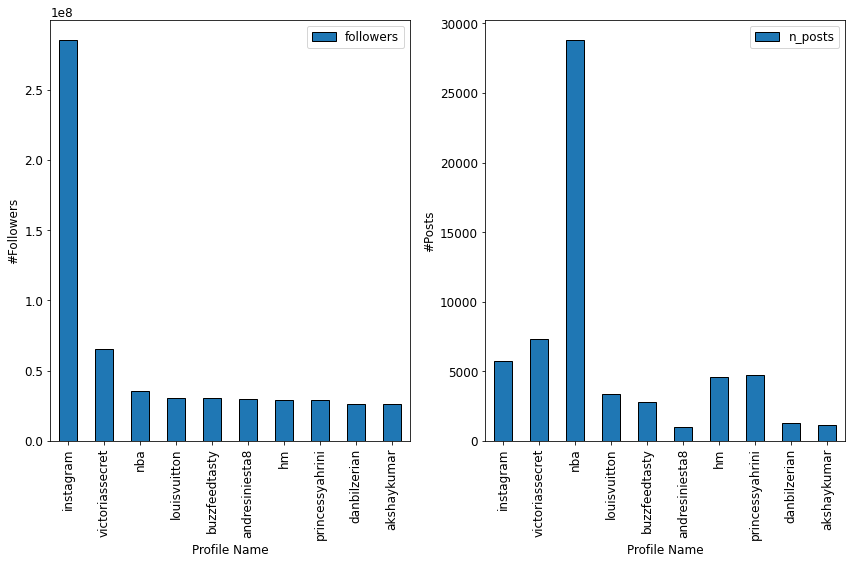

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

top_10_profiles.plot.bar(x='profile_name', y='followers', ax=ax1, edgecolor='black')
ax1.set_xlabel('Profile Name')
ax1.set_ylabel('#Followers')

top_10_profiles.plot.bar(x='profile_name', y='n_posts', ax=ax2, edgecolor='black')
ax2.set_xlabel('Profile Name')
ax2.set_ylabel('#Posts')

fig.tight_layout()
plt.show()

##### Who is the most influential user?

In [70]:
top_names = top_10_profiles['profile_name']
top_ids = top_10_profiles['profile_id']
top_sids = top_10_profiles['sid']

In [31]:
top_10_profiles

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


According to the definition of "influential" in the task, the "Instagram" profile is the most influential user.

##### Have they posted anything with tagged locations? 

In [6]:
loc_columns = ['profile_id', 'location_id', 'sid_profile']
post_loc_df = pd.read_csv(path_to_posts, delimiter='\t', usecols=loc_columns)

In [9]:
top_post_loc_df = post_loc_df[post_loc_df["profile_id"].isin(top_ids)]

In [12]:
print('Number of posts:', 3*'\t', len(top_post_loc_df))
print('Number of posts w/ tagged location:', '\t', len(top_post_loc_df[~top_post_loc_df['location_id'].isna()]))
print('Number of posts w/o tagged location:', '\t ', len(top_post_loc_df[top_post_loc_df['location_id'].isna()]))

Number of posts: 			 141
Number of posts w/ tagged location: 	 105
Number of posts w/o tagged location: 	  36


#### Extract the most frequent areas on their posts and plot the number of times each city has been visited.

Text(0.5, 1.0, 'Frequency of visited cities of top instagram user')

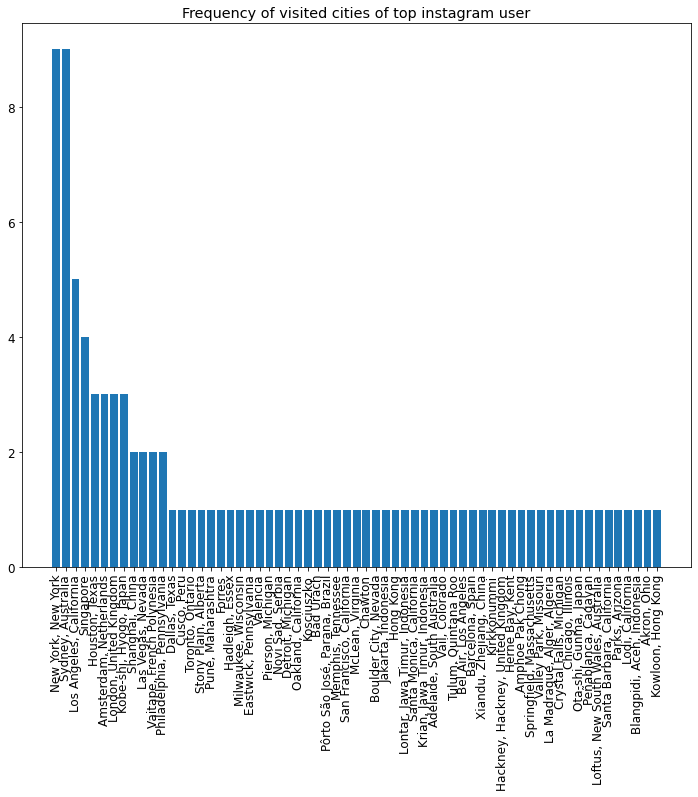

In [17]:
city_dic = {}
for post_loc in top_post_loc_df["location_id"].dropna():
    current_city = loc_df[loc_df.id == post_loc]["city"].iloc[0] # Look up the city name in the loc_df
    
    if type(current_city) == float: # To catch some exceptions
        continue
    elif current_city in city_dic.keys():
        city_dic[current_city] += 1
    else:
        city_dic[current_city] = 1

sorted_city_dic = {k: v for k, v in sorted(city_dic.items(), key=lambda item: item[1], reverse=True)}
        
labels = list(map(str, sorted_city_dic.keys()))
values =  sorted_city_dic.values()

plt.bar(height=values, x=range(len(labels)), tick_label=labels) # , edgecolor='black'
plt.xticks(rotation=90)
plt.title("Frequency of visited cities of top instagram user")

#### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [68]:
type_columns = ["profile_id", "post_type", "numbr_likes", "number_comments"]
post_type_df = pd.read_csv(path_to_posts, delimiter='\t', usecols=type_columns)

1    128
2     13
Name: post_type, dtype: int64


Text(0.5, 1.0, '% of post types')

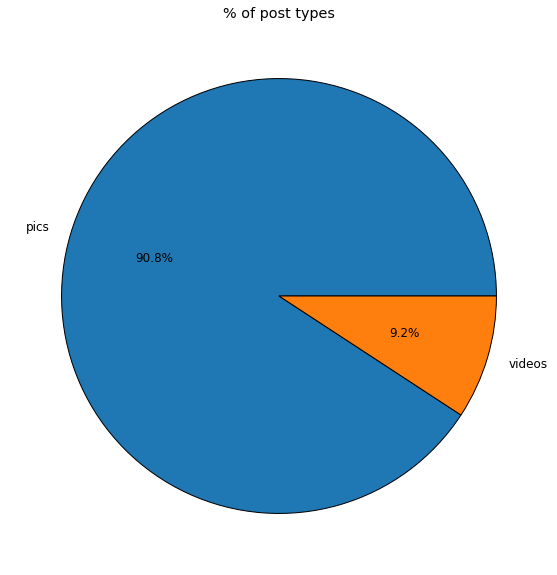

In [71]:
top_post_type = post_type_df[post_type_df["profile_id"].isin(top_ids)]

type_counts = top_post_type['post_type'].value_counts()
print(type_counts)
n_pics = type_counts[1]
n_vids = type_counts[2]
n_mixd = 0 # type_counts[3] = 0

labels = ['pics', 'videos'] # , 'multy']

plt.pie([n_pics, n_vids], labels=labels, explode=[0, 0], autopct='%1.1f%%', 
        wedgeprops={"edgecolor": "black"})
plt.title('% of post types')


We notice that they haven't posted anything with both contents. From this plot we can figure out that posts are more common than videos since people post them way more. In fact, videos aren't really common on the platform.

#### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [72]:
post_type_gb = top_post_type.groupby(["profile_id", "post_type"])
post_type_mean_df = post_type_gb.mean()

In [73]:
for profile_id in top_ids:
    mask = post_type_mean_df.index.get_level_values(0) == profile_id
    post_type_mean_df.loc[mask, "n_follower"] = top_10_profiles[top_10_profiles.profile_id == profile_id]['followers'].iloc[0]

In [74]:
post_type_mean_df["likes_ratio"] = post_type_mean_df["numbr_likes"]/post_type_mean_df["n_follower"]
post_type_mean_df["comment_ratio"] = post_type_mean_df["number_comments"]/post_type_mean_df["n_follower"]

In [75]:
post_type_mean_df

numbr_likes  number_comments   n_follower  \
profile_id   post_type                                               
3.416684e+06 1          2.307498e+05       438.400000   65269440.0   
             2          2.614080e+05       583.000000   65269440.0   
2.082449e+07 1          2.422357e+05      1087.846154   35339708.0   
             2          2.072956e+05      1026.800000   35339708.0   
2.341008e+07 1          8.121350e+04       365.000000   29176804.0   
2.423993e+07 1          1.418733e+05       757.434783   29042823.0   
             2          4.176367e+04       903.333333   29042823.0   
2.502532e+07 1          9.059335e+05      6703.290323  285457645.0   
             2          5.934097e+05      5749.333333  285457645.0   
5.041706e+07 1          8.631133e+05      8594.733333   26476004.0   
1.876191e+08 1          1.868570e+05       867.000000   30689316.0   
4.968651e+08 1          4.730227e+05      2237.083333   29542143.0   
9.070254e+08 1          1.027102e+06      6582.461538   26252169.0   
2.125507e+09 1          1.008629e+05       963.153846   30246783.0   

                        likes_ratio  comment_ratio  
profile_id   post_type                              
3.416684e+06 1             0.003535       0.000007  
             2             0.004005       0.000009  
2.082449e+07 1             0.006854       0.000031  
             2             0.005866       0.000029  
2.341008e+07 1             0.002783       0.000013  
2.423993e+07 1             0.004885       0.000026  
             2             0.001438       0.000031  
2.502532e+07 1             0.003174       0.000023  
             2             0.002079       0.000020  
5.041706e+07 1             0.032600       0.000325  
1.876191e+08 1             0.006089       0.000028  
4.968651e+08 1             0.016012       0.000076  
9.070254e+08 1             0.039124       0.000251  
2.125507e+09 1             0.003335       0.000032

From this table we notice that, usually, likes and comments are higher for posts than videos. The most followed account on the list (with profile_id = 2.502532e+07) has a higher number of comments for the second post_type, which is videos, but the profile with profile_id = 5.041706e+07 has a higher number of comments for posts with only pictures, even though he has less followers than the one highlighted before. We notice that the likes_ratio is way higher than the comment_ratio because likes are more "common" than comments.

### Research Question 6

#### What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [4]:
post_df = pd.read_csv(path_to_posts, delimiter = '\t', usecols = ["profile_id", "cts"]).dropna()

In [5]:
post_df['cts'] = pd.to_datetime(post_df['cts'])

In [ ]:
# The following line groups the post_df by profile id, then looks at the cts column and for each group, sorts the 
# times, computes the difference between each line and the following and finally computes the mean of said 
# differences

# However this takes a long time (>20min on remote)

avg_time_df = (post_df.groupby(by='profile_id')
                      .cts
                      .agg(avg_time_diff=lambda group: group.sort_values().diff().mean()))

In [12]:
from datetime import timedelta

In [40]:
top_3_avg_time = avg_time_df[avg_time_df["avg_time_diff"] > timedelta(0)].sort_values(by='avg_time_diff').head(3)

In [44]:
top_3_avg_time['profile_name'] = profiles_df[profiles_df.profile_id.isin(top_3_avg_time.index)]["profile_name"].to_list()

In [45]:
top_3_avg_time

,avg_time_diff,profile_name
profile_id,,
8.278512e+09,0 days 00:00:00.090909090,5588kkll
6.109198e+09,0 days 00:00:00.090909090,msidney087
8.996413e+09,0 days 00:00:00.333333333,no.name7291


#### Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.


In [4]:
columns = ['cts','numbr_likes','number_comments']

In [6]:
df_posts = pd.read_csv(path_to_posts,delimiter='\t', usecols=columns)

In [27]:
df_posts['cts'] = pd.to_datetime(df_posts['cts'])

In [28]:
df_lk = df_posts[['cts','numbr_likes']].dropna()

In [29]:
df_cmm = df_posts[['cts','number_comments']].dropna()

In [30]:
def time_to_plot(list_of_intervals,df):
    bin_list = [] # Store start and end times of each interval
    labels = []   # For plotting x labels
    for t_0, t_end in list_of_intervals:
        labels.append(' -> '.join([t_0, t_end]))
        
        t_0 = pd.to_datetime(t_0).time()
        t_end = pd.to_datetime(t_end).time()
        
        bin_list.append((t_0.hour, t_end.hour))
    
    loc = range(len(labels))
    bins = pd.IntervalIndex.from_tuples(bin_list) # Create pandas bins for grouping
    result_df = df.groupby(pd.cut(df["cts"].dt.hour, bins=bins)).mean()
    
    result_df.plot(kind="bar", edgecolor="black")
   
    plt.xlabel("Time")
    plt.ylabel(df.columns.values[1])
    plt.xticks(loc, labels, rotation="vertical")
    plt.show()

In [31]:
time_intervals = [("06:00:00", "13:59:59"), 
                  ("14:00:00", "19:59:59"), 
                  ("20:00:00", "23:59:59"),
                  ("00:00:00", "05:59:59")] 

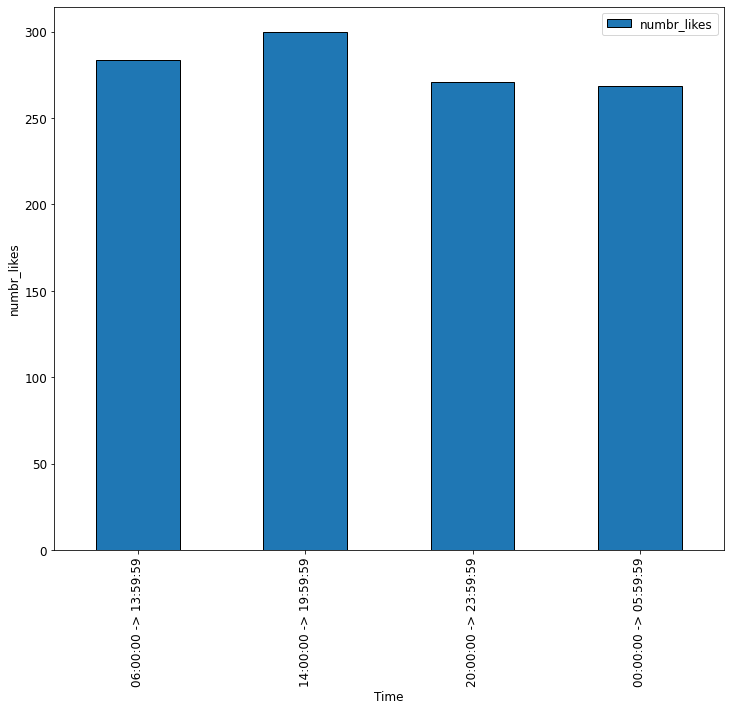

In [32]:
time_to_plot(time_intervals, df_lk)

As we can observe from the previous plot the time interval with the highest average number of likes is among 14:00 and 20:00, afternoon range.

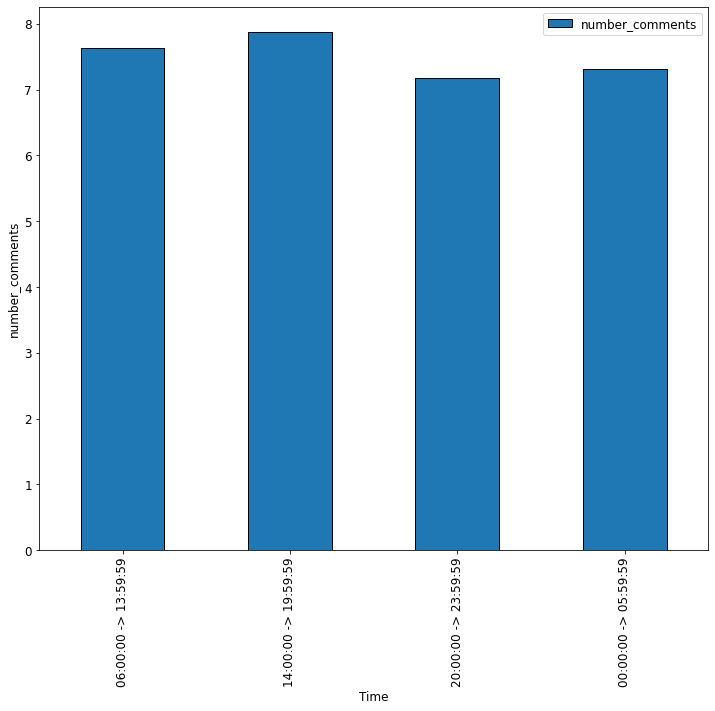

In [33]:
time_to_plot(time_intervals, df_cmm)

Additionally we can observe that from the histogram plot above the time interval with the highest average number of comments is among 14:00 and 20:00, afternoon range as well likes. From this information we can suppose that users interacts more in afternoon compared to the rest of the day. In addition, the average number of comments is significantly lower than the number of likes. Certainly the average number of comments is affected by the high number of posts with zero comments.

### Research Question 7

#### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [14]:
# Preparing the data_posts dataframe

columns = ['profile_id', 'numbr_likes']
data_posts = pd.read_csv(path_to_posts, usecols = columns, delimiter='\t')

In [15]:
avg_likes = data_posts.dropna().groupby('profile_id', as_index= False).mean().rename(columns={'numbr_likes': 'avg_likes'}) 

In [20]:
# Preparing the profile_id dataframe

columns = ['profile_id', 'followers']
data_profiles_red = profiles_df.loc[:, columns]
data_profiles_red.dropna()

,profile_id,followers
0,4.721050e+09,146.0
1,5.905830e+08,1145.0
2,1.074147e+09,324.0
5,1.450642e+08,192.0
6,2.061868e+09,4137.0
...,...,...
4509578,4.038738e+09,809.0
4509579,1.840612e+08,599.0
4509580,4.070370e+09,261.0
4509581,1.418322e+09,481.0


In [21]:
joined = pd.merge(avg_likes, data_profiles_red, how='right').dropna()
joined

,profile_id,avg_likes,followers
0,4.721050e+09,12.666667,146.0
1,5.905830e+08,36.230769,1145.0
2,1.074147e+09,63.666667,324.0
5,1.450642e+08,14.538462,192.0
6,2.061868e+09,307.937500,4137.0
...,...,...,...
4509578,4.038738e+09,21.461538,809.0
4509579,1.840612e+08,43.000000,599.0
4509580,4.070370e+09,27.333333,261.0
4509581,1.418322e+09,56.285714,481.0


In [22]:
# We need to compute the probability P{20% of the #like > #followers}
# One thing we can do is keeping only the profile_ids where the condition is true (success)

result_df = joined[joined['avg_likes']*0.2 > joined['followers']]

#result_df: 180 266 rows

In [23]:
# Computation of the probability

probability = len(result_df)/len(joined)
print('The probability that a user has a number of followers smaller than the 20% of the number of likes is: ', round(probability,4))

The probability that a user has a number of followers smaller than the 20% of the number of likes is:  0.0011


In [ ]:
# Clean the ram
# dataframes = list((data_profiles_red, data_posts))
# del dataframes

#### Do users usually return to locations? 

In [24]:
type_columns = ["post_id", "profile_id", "location_id"]
post_type_df = pd.read_csv(path_to_posts, delimiter='\t', usecols=type_columns)

In [25]:
def user_returning(df):
    
    len_group = len(df['location_id'])
    set_group = len(df['location_id'].unique())
    
    if len_group != set_group: # If the size of the set of all visited locations and the length of the list of 
                               # of the all visited locations differ, it means a user has returned to the same
                               # location at least once
        return True
    else:
        return False

In [ ]:
user_return_df = post_type_df.groupby('profile_id').apply(user_returning).value_counts()

In [33]:
# RESULTS:
# n_true = 8724511
# n_false = 3109254

11833765

From these results we can say that users usually return to location.

### Research Question 8

#### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [8]:
data_posts = pd.read_csv(path_to_posts, delimiter = '\t', usecols = ["numbr_likes", "number_comments"])

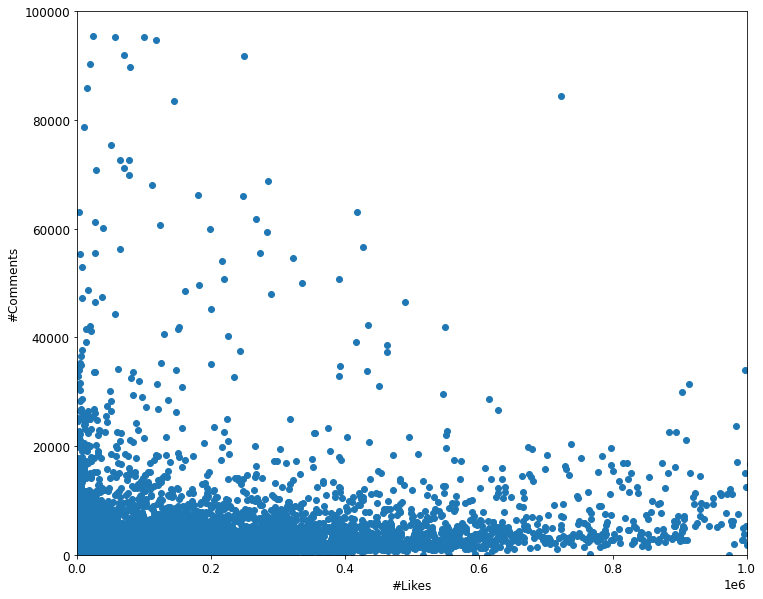

In [12]:
x = np.array([data_posts["numbr_likes"]])
y = np.array([data_posts["number_comments"]])
plt.xlabel("#Likes")
plt.ylabel("#Comments")
plt.xlim([0, 1000000]) # To set axis range
plt.ylim([0, 100000])
plt.scatter(x,y)
plt.show()

There is no upward or downward movement of the data points so there's no strong correlation between the number of likes and the number of comments. What we can notice is that likes are way higher than comments, because comments are less common.
So we cannot really say that more likes also mean more comments.

#### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [34]:
import datetime

In [35]:
col = ["numbr_likes", "number_comments", "cts"]

df_posts = pd.read_csv(path_to_posts, delimiter = "\t", usecols = col).dropna()

In [36]:
df_posts['cts'] = pd.to_datetime(df_posts['cts'])

In [37]:
df_posts['cts'].dt.hour

# We take into account only the hour of publication of the post, 
# without minutes and seconds

0           20
1            9
2           20
3           16
4           10
            ..
42710192    15
42710193    11
42710194    20
42710195    20
42710196     2
Name: cts, Length: 42706865, dtype: int64

In [38]:
df_posts['hour'] = df_posts['cts'].dt.hour

In [39]:
df_posts = df_posts.drop(columns=['cts'])

In [40]:
df_posts.corr() 

,numbr_likes,number_comments,hour
numbr_likes,1.000000,0.374454,0.001154
number_comments,0.374454,1.000000,0.000506
hour,0.001154,0.000506,1.000000


From this table we can say that there is a slightly positive correlation among #likes and #comments. Instead the correlation is very low if we consider the "hour" index.

In [41]:
cm = df_posts[['number_comments','hour']]
lk = df_posts[['numbr_likes','hour']]

In [42]:
cm

,number_comments,hour
0,0.0,20
1,1.0,9
2,0.0,20
3,0.0,16
4,0.0,10
...,...,...
42710192,0.0,15
42710193,0.0,11
42710194,0.0,20
42710195,1.0,20


In [43]:
#Let's check by couples 

cm.corr()

,number_comments,hour
number_comments,1.000000,0.000506
hour,0.000506,1.000000


In [44]:
lk.corr()

,numbr_likes,hour
numbr_likes,1.000000,0.001154
hour,0.001154,1.000000


So the correlation with time variable is very low, the number of likes is slightly more correlated to the hour of pubblication of the post.

In [45]:
print(df_posts.var()['numbr_likes'])

37513748.18538424


In [46]:
print(df_posts.var()['number_comments'])

37696.01916696919


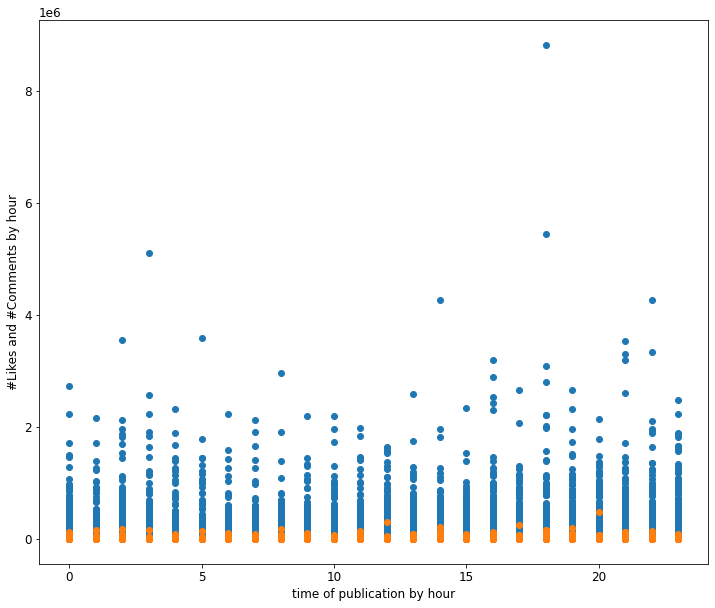

In [47]:
# By likes
x=df_posts['hour']
y=df_posts['numbr_likes']
plt.scatter(x,y)

# By comments
x=df_posts['hour']
y=df_posts['number_comments']
plt.scatter(x,y) # In orange

plt.xlim=([0,24])
plt.ylim=([0,100000])
plt.xlabel('time of publication by hour')
plt.ylabel('#Likes and #Comments by hour')
plt.show()

From the previous scatterplot we can observe that the distribution of comments and likes is different based on "hour" indexs: comments distribution is "Uniform" in time (we can approximate it to a uniform distribution) , likes distribution between 14:00 and 22:00 have the maximum number of interactions. The poor correlation between likes and comments may depend on the fact that the dataset does not specify the time zone between the different zones where the posts are allocated.

#### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [49]:
foll = np.array(profiles_df["followers"].dropna())
foll

array([ 146., 1145.,  324., ...,  261.,  481.,  153.])

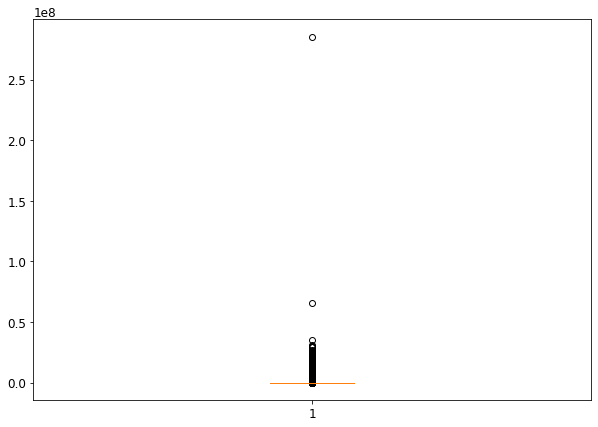

In [50]:
fig = plt.figure(figsize = (10, 7))
plt.boxplot(foll)
plt.show()

In [51]:
modefoll = mode(foll)
modefoll[0][0]

0.0

In [52]:
meanfoll = np.mean(foll)
meanfoll

4739.899180397426

In [54]:
quantile25 = np.quantile(foll, .25)
quantile50 = np.quantile(foll, .5)
quantile75 = np.quantile(foll, .75)
print("1st quantile:", quantile25,".", "Median:", quantile50, ".", "3rd quantile:", quantile75, ".")

1st quantile: 159.0 . Median: 406.0 . 3rd quantile: 974.0 .


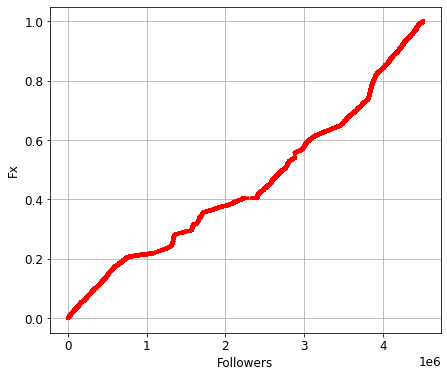

In [55]:
def distr(followers):
    followers = followers/np.sum(followers)
    return np.cumsum(followers)

plt.figure(figsize=(7,6))
freq = distr(profiles_df["followers"])
plt.plot(freq,color = "red",linewidth = 3)
plt.ylabel('Fx')
plt.xlabel("Followers")
plt.grid()
plt.show()

In [56]:
profiles_df["followers"].describe()

# It's obvious how median is a more robust index than mean.
# Outliers in this dataset are many and we have to be careful to consider the average index in our analysis.

count    3.452771e+06
mean     4.739899e+03
std      1.939087e+05
min      0.000000e+00
25%      1.590000e+02
50%      4.060000e+02
75%      9.740000e+02
max      2.854576e+08
Name: followers, dtype: float64

What we can extract from these numbers and plot is that it's a distribution full of outliers so the median is a stronger statistical figure to summarize the array. As we can tell the mode, the mean and the median are very different from each other: 0 is the most common "followers" number, meanwhile the mean is 4739.81 and the median is 406.0. The mean is so much higher than the median that it's actually higher than the 3rd quantile as well (974.0). This is way, in this case, we should look at the median. The outliers have such high numbers that the boxplot appears to be just a simple line, when it's actually just very compressed.

#### What are histograms, bar plots, scatterplots and pie charts used for?

The histogram is used for graphical representations of frequency: it is obtained by placing the extremes of each class on the x-axis and, for each class, drawing a rectangle with a height equal to the frequency density. Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs (like histograms) and line graphs, pie charts do not show changes over time. The barplot is different from the frequency histogram in that it shows each categorical variable in relation to its numerical value due to the size of its column. The scatter plot is used when working with a double-disaggregated distribution provided only that the characters are quantitative. Pairs of observed values are represented by placing the X-values on the x-axis and the Y-values on the y-axis.

#### What insights can you extract from a Box Plot?

Box plots are used when there are distributions of quantitative values. They are useful for quickly understanding the distribution of data (median, quantiles, etc.), especially symmetry and outliers. It is also useful for comparing several distributions of data.



## Bonus Points

### Note that we tried to do the A exercise of the bonus points but the pd.merge gives us a MemoryError. In theory, we think that the code is right so we'll add it anyway. We tried running less rows but doesn't return any result since maybe the profile ids don't match.

#### Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [46]:
profiles = pd.read_csv(path_to_profiles, delimiter = "\t", usecols = ['profile_id', 'followers'])

In [56]:
top10 = profiles[profiles.followers >= profiles.followers.quantile(0.9)]

In [57]:
other = profiles[profiles.followers < profiles.followers.quantile(0.9)]

In [53]:
posts_intervals = pd.read_csv(path_to_posts, delimiter = "\t", usecols = ["profile_id", "cts"])

In [58]:
df_1 = pd.merge(posts_intervals, top10, left_on = "profile_id", right_on = "profile_id")

MemoryError: Unable to allocate 5.65 GiB for an array with shape (758305966,) and data type int64

In [28]:
df_2 = pd.merge(posts_intervals, other, left_on = "profile_id", right_on = "profile_id")

MemoryError: Unable to allocate 617. GiB for an array with shape (82786111910,) and data type int64

In [ ]:
def condition(x):
    if len(x) > 1:
        return x.diff().mean()

In [20]:
avg_time_top10 = (df1.groupby(by='profile_id')
                      .cts
                      .agg(avg_time_diff=lambda group: condition(group)))
avg_time_top10

,avg_time_diff
profile_id,


In [21]:
avg_time_others = (df2.groupby(by='profile_id')
                      .cts
                      .agg(avg_time_diff=lambda group: condition(group)))
avg_time_others

,avg_time_diff
profile_id,


#### Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

#### Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

### Alogrithmic Question 1

In [47]:
def f1(seq, end):
    global counter_1
    counter_1 += 1
    # print(' '.join(seq))
    # print('\n')

In [60]:
def f2(seq, start, end):
    global counter_2
    counter_2 += 1
    if start == end:
        f1(seq, end)                 #
    else:
        for i in range(start, end):
            temp = seq[start]
            seq[start] = seq[i]      # swap seq[start]
            seq[i] = temp            # and seq[i]
            
            f2(seq, start+1, end)    # call f2 with swapped chars
                                     # we call it N times
                                     # 
            temp = seq[start]        
            seq[start] = seq[i]      # swap
            seq[i] = temp            # back

This algorithm computes all the possible permutations for the complete sequence and for each subsequence going to the right from the start. This is done swapping the character at location "start" with the character at location "i", then calling the function again on this altered sequence and undoing the character-swap. \
The inner loop leads to a runtime of O(n!), since the recursive call needs one iteration less because of the "start+1".

/tmp/ipykernel_4412/4056211887.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(max_N))*factorial(np.arange(max_N)), label="log(N)*fac N")


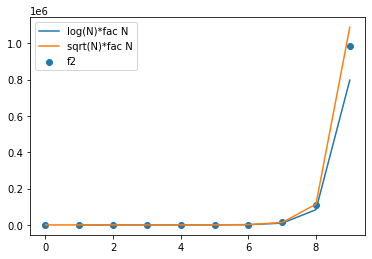

In [65]:
from scipy.special import factorial

loc_1, loc_2 = [], []
max_N = 10
for i in range(max_N):
    counter_1, counter_2 = 0, 0
    f2(list(range(i)), 0, i)
    loc_1.append(counter_1)
    loc_2.append(counter_2)

plt.scatter(range(max_N), loc_2, label="f2")

plt.plot(np.log(np.arange(max_N))*factorial(np.arange(max_N)), label="log(N)*fac N")
plt.plot(np.sqrt(np.arange(max_N))*factorial(np.arange(max_N)), label="sqrt(N)*fac N")

plt.legend()

As we can see from the plot, the f2 function is approximated by log(n)*n\! from the below and by sqrt(n)*n! from above. Therfore overall we can say f2 is in O(sqrt(n)*n!).

### Algorithmic Question 2

In [74]:
def ribbon_rec(N):
    if N == 1:
        return [1]
    
    temp = []    # Store the maximal values here
    arr = np.ones(N)
    n = int(N/2) # Divide by 2 and ceiling since cutting e.g. N=5 at 2 yields the ribbon pairs (2, 3) which is the same as
                 # cutting at 3 which would yield the pair (3, 2)
    for i in range(1, n+1):
        
        k, l = len(arr[:i]), len(arr[i:])
        
        temp.append(k * l)
        temp.append(k * max(ribbon_rec(l)))
        
    return temp

When thinking of the recursive algorithm as going deeper into a recursion tree, we append the maximum of each level to the very first temp list. Therefore we need to call the max() method on the final output (see cell below). \
For each level we want to store the values for k * l which resemles cutting once, at that level and doing more cuts, resembled by k * max(ribbon_rec(l)). \
By iterating over all possible pairs (k, l) for each level we calcualte all possible values and therefore the maximal value as well.

In [32]:
def ribbon_poly(N):
    if N == 2:
        return 1
    if N == 3:
        return 2
    dictp = {"1":1 , "2": 2, "3": 3}
    for i in range(4, N+1):
        halfi = int(i/2)
        prod = []
        arr = np.ones(i)
        
        for j in range(1, halfi+1):
            k, l = len(arr[:j]), len(arr[j:])
            prod.append(dictp[str(k)]*dictp[str(l)])
             
        maxp = max(prod)    
        dictp[str(i)] = maxp
    return dictp[str(N)]

Instead of branching into a tree, when solve the problem in a bottom-up fashion. We have the base cases 2 and 3, for which we can only obtain one result. Also these are the cases where the final product is actually smaller than the N itself. \
In a dictionary we store all solutions for the subproblems i<N. By storing the sub-solutions, we later only need to compare the prodcut of all possible pairs (k, l).

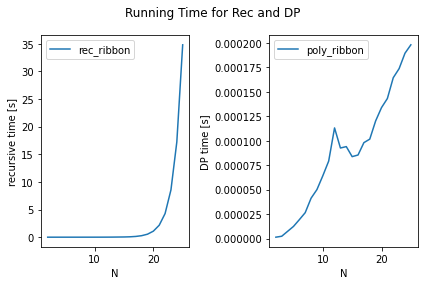

In [69]:
rec_times, poly_times = [], []

for N in range(2, 26):
    t0_rec = time.time()
    max(ribbon_rec(N))
    T_rec = time.time() - t0_rec
    
    t0_poly = time.time()
    ribbon_poly(N)
    T_poly = time.time() - t0_poly
    
    rec_times.append(T_rec)
    poly_times.append(T_poly)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

ax1.plot(np.arange(2,26), rec_times, label="rec_ribbon")
ax1.set_xlabel("N")
ax1.set_ylabel("recursive time [s]")
ax1.legend()

ax2.plot(np.arange(2,26), poly_times, label="poly_ribbon")
ax2.set_xlabel("N")
ax2.set_ylabel("DP time [s]")
ax2.legend()

fig.suptitle("Running Time for Rec and DP")
plt.tight_layout()
plt.show()

Note the difference between the values on the y-axis. The DP variant is much faster. \
The recursive variant clearly approximates an exponential function. The recursive algorithm branches for each iteration into two branches making the runtime exponential, O(2^n). \
The polynomial algorithm is much faster, since we have a for loop and a nested for loop, both bounded by n which lead to the polynomial runtime O(n^2).